# Evaluation of the Randomized Workload

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
# get access to our utility scripts
import sys
utils_path = "../utils/"
if not utils_path in sys.path:
    sys.path.insert(0, utils_path)
from helper import *

## Data loading

Run 1:

In [3]:
df1 = pd.read_csv("workloads/randomized/job-complete-aqo-1-cout.csv")
df1.reset_index(inplace=True)
df1["index"] += 1
df1.sort_values(by="label", inplace=True)

Run 2:

In [4]:
df2 = pd.read_csv("workloads/randomized/job-complete-aqo-2-cout.csv")
df2.reset_index(inplace=True)
df2["index"] += 1
df2.sort_values(by="label", inplace=True)

Run 3:

In [5]:
df3 = pd.read_csv("workloads/randomized/job-complete-aqo-3-cout.csv")
df3.reset_index(inplace=True)
df3["index"] += 1
df3.sort_values(by="label", inplace=True)

## Detecting queries with different $C_{out}$ values

In [6]:
proj = ["cout", "t_exec", "label", "index"]
_m1 = pd.merge(df1[proj], df2[proj], on="label", suffixes=["_run1", "_run2"])
df_comb = pd.merge(_m1, df3[proj], on="label", suffixes=["", "_run3"])
df_comb.set_index("label", inplace=True)
df_comb.rename(columns={"cout": "cout_run3", "t_exec": "t_exec_run3", "index": "index_run3"}, inplace=True)

In [7]:
cout_cols = ["cout_run1", "index_run1", "cout_run2", "index_run2", "cout_run3", "index_run3"]
t_exec_cols = ["t_exec_run1", "index_run1", "t_exec_run2", "index_run2", "t_exec_run3", "index_run3"]

In [8]:
df_comb["diff_1_2"] = df_comb.cout_run1 != df_comb.cout_run2
df_comb["diff_1_3"] = df_comb.cout_run1 != df_comb.cout_run3
df_comb["diff_2_3"] = df_comb.cout_run2 != df_comb.cout_run3
df_comb["diff_any"] = df_comb.diff_1_2 | df_comb.diff_1_3 | df_comb.diff_2_3
df_comb[df_comb.diff_any][cout_cols]

,cout_run1,index_run1,cout_run2,index_run2,cout_run3,index_run3
label,,,,,,
13b,1912702,50,1912702,99,2641491,37
13c,2640445,26,2640445,72,1912521,108
16a,2602623,108,14366,26,14366,73
16d,216884,43,619573,50,619573,98
17b,399376,30,3599101,108,399376,70
17c,3533427,83,362078,55,3533427,113
22a,167972,101,492850,96,167972,32
22b,380673,25,163944,103,380673,26
2a,68686,41,804167,59,68546,107


In [9]:
df_comb[df_comb.diff_any][t_exec_cols]

,t_exec_run1,index_run1,t_exec_run2,index_run2,t_exec_run3,index_run3
label,,,,,,
13b,14931.466,50,15476.340,99,20618.351,37
13c,22531.254,26,20874.950,72,14728.999,108
16a,24687.911,108,14697.899,26,14672.818,73
16d,20714.552,43,20028.361,50,19205.697,98
17b,30549.297,30,27558.473,108,25974.502,70
17c,25371.218,83,23435.039,55,25159.056,113
22a,10055.220,101,11210.206,96,9831.744,32
22b,11267.370,25,10086.261,103,10638.097,26
2a,2575.391,41,5760.084,59,2319.825,107


---

# Evaluation of the Incremental Workload

In [10]:
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

In [11]:
# get access to our utility scripts
import sys
utils_path = "../utils/"
if not utils_path in sys.path:
    sys.path.insert(0, utils_path)
from helper import *

## Data loading

In [12]:
df_native = pd.read_csv("../ues/workloads/job-implicit-cout.csv")
df_run1 = pd.read_csv("workloads/incremental/job-full-run-1-cout.csv")
df_run2 = pd.read_csv("workloads/incremental/job-full-run-2-cout.csv")
df_run3 = pd.read_csv("workloads/incremental/job-full-run-3-cout.csv")
df_run1["run"] = 1
df_run1.plan = df_run1.plan.apply(json.loads)
df_run2["run"] = 2
df_run2.plan = df_run2.plan.apply(json.loads)
df_run3["run"] = 3
df_run3.plan = df_run3.plan.apply(json.loads)
df_aqo = pd.concat([df_run1, df_run2, df_run3])
df_aqo

,query,cout,plan,t_exec,t_plan,label,run
0,"SELECT COUNT(*) FROM char_name AS chn, cast_in...",38424,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...",23480.780,110.555,10a,1
1,"SELECT COUNT(*) FROM char_name AS chn, cast_in...",4,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...",10420.391,22.254,10b,1
2,"SELECT COUNT(*) FROM char_name AS chn, cast_in...",1260587,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...",19898.561,7.607,10c,1
3,"SELECT COUNT(*) FROM company_name AS cn, compa...",403299,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...",3835.188,72.951,11a,1
4,"SELECT COUNT(*) FROM company_name AS cn, compa...",1301,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...",19560.226,15.755,11b,1
...,...,...,...,...,...,...,...
108,"SELECT COUNT(*) FROM aka_name AS an1, cast_inf...",872726,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...",15853.688,6.219,8d,3
109,"SELECT COUNT(*) FROM aka_name AS an, char_name...",403264,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...",14105.930,18.249,9a,3
110,"SELECT COUNT(*) FROM aka_name AS an, char_name...",138596,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...",12357.023,15.859,9b,3
111,"SELECT COUNT(*) FROM aka_name AS an, char_name...",276606,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...",13456.577,11.716,9c,3


In [13]:
df_baseline = pd.read_csv("../ues/workloads/job-implicit-cout.csv")
df_baseline["run"] = "baseline"

Query with maximum runtime during the first iteration:

In [14]:
df_aqo[df_aqo.label.isin(df_run1[df_run1.t_exec == df_run1.t_exec.max()].label)]

,query,cout,plan,t_exec,t_plan,label,run
63,"SELECT COUNT(*) FROM complete_cast AS cc, comp...",109305,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...",395029.166,797.454,27a,1
63,"SELECT COUNT(*) FROM complete_cast AS cc, comp...",227911,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...",8843.744,794.242,27a,2
63,"SELECT COUNT(*) FROM complete_cast AS cc, comp...",106677,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...",299218.889,788.212,27a,3


In [15]:
df_aqo.groupby("run").t_exec.describe()

,count,mean,std,min,25%,50%,75%,max
run,,,,,,,,
1,113.0,21072.411646,42058.050599,794.170,8971.738,14543.107,20091.482,395029.166
2,113.0,13573.078743,10158.025080,791.983,8451.576,11902.815,19747.033,76928.338
3,113.0,48604.716097,218978.744631,788.624,8557.865,11987.346,19129.957,1703686.905


## Comparison of the different workload iterations

In [16]:
grp_run = df_aqo.groupby("run")

Average query execution time (in seconds):

In [17]:
grp_run.t_exec.describe()["mean"] / 1000

run
1    21.072412
2    13.573079
3    48.604716
Name: mean, dtype: float64

Average query planning time (in seconds):

In [18]:
grp_run.t_plan.describe()["mean"] / 1000

run
1    0.192078
2    0.189988
3    0.189535
Name: mean, dtype: float64

Total workload execution time (**in minutes!**):

In [19]:
(grp_run.t_exec.sum() + grp_run.t_plan.sum()) / 60000

run
1    40.048122
2    25.920442
3    91.895839
dtype: float64

Distribution of the different execution times:

## Why do runtimes increase so much for the final run?

In [20]:
grp_query = df_aqo.groupby("label")

In [21]:
def t_exec_increase(grp):
    init_t_exec = grp[grp.run == 1].t_exec
    final_t_exec = grp[grp.run == 3].t_exec
    return final_t_exec / init_t_exec

First up, compare how much the runtimes actually increase between first and third run:

In [22]:
ser_rt_inc = grp_query.apply(t_exec_increase).reset_index(level=0).set_index("label").squeeze()
ser_rt_inc.describe()

count    113.000000
mean       1.946048
std        6.187333
min        0.121757
25%        0.872765
50%        0.978664
75%        1.024933
max       58.033085
Name: t_exec, dtype: float64

In [23]:
df_aqo = df_aqo.join(ser_rt_inc, on="label", rsuffix="_increase")
df_aqo

,query,cout,plan,t_exec,t_plan,label,run,t_exec_increase
0,"SELECT COUNT(*) FROM char_name AS chn, cast_in...",38424,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...",23480.780,110.555,10a,1,0.484103
1,"SELECT COUNT(*) FROM char_name AS chn, cast_in...",4,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...",10420.391,22.254,10b,1,1.004212
2,"SELECT COUNT(*) FROM char_name AS chn, cast_in...",1260587,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...",19898.561,7.607,10c,1,0.710340
3,"SELECT COUNT(*) FROM company_name AS cn, compa...",403299,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...",3835.188,72.951,11a,1,0.524268
4,"SELECT COUNT(*) FROM company_name AS cn, compa...",1301,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...",19560.226,15.755,11b,1,0.121757
...,...,...,...,...,...,...,...,...
108,"SELECT COUNT(*) FROM aka_name AS an1, cast_inf...",872726,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...",15853.688,6.219,8d,3,0.808406
109,"SELECT COUNT(*) FROM aka_name AS an, char_name...",403264,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...",14105.930,18.249,9a,3,1.074978
110,"SELECT COUNT(*) FROM aka_name AS an, char_name...",138596,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...",12357.023,15.859,9b,3,1.025814
111,"SELECT COUNT(*) FROM aka_name AS an, char_name...",276606,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...",13456.577,11.716,9c,3,0.905402


In [24]:
def qerror(actual, expected):
    data = np.asarray([actual, expected])
    return (np.max(data, axis=0)+1) / (np.min(data, axis=0)+1)

In [25]:
def extract_planned_rows(plan):
    node = plan[0]["Plan"]
    while node["Node Type"] == "Aggregate" or node["Node Type"] == "Gather":
        node = node["Plans"][0]
    return node["Plan Rows"], node["Actual Rows"]

In [26]:
optimizer_estimates = df_aqo.plan.apply(extract_planned_rows)
planned_rows = [est[0] for est in optimizer_estimates]
actual_rows = [est[1] for est in optimizer_estimates]
df_aqo["qerror"] = qerror(actual_rows, planned_rows)

The large increase in execution time is caused by a couple of outliers:

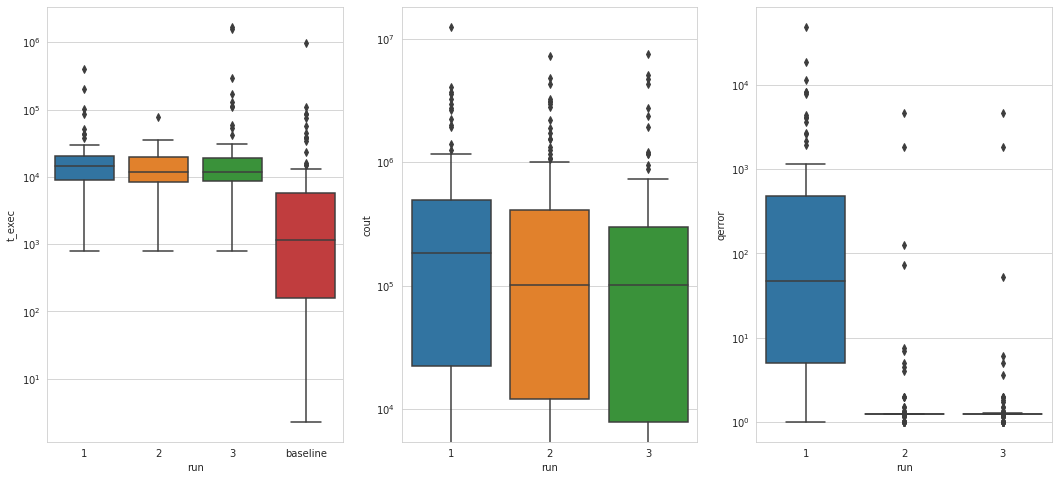

In [27]:
fig, (ax_t_exec, ax_cout, ax_qerror) = plt.subplots(nrows=1, ncols=3, figsize=(18,8))
g = sns.boxplot(data=pd.concat([df_aqo, df_baseline]), x="run", y="t_exec", ax=ax_t_exec)
g.set_yscale("log")
g = sns.boxplot(data=df_aqo, x="run", y="cout", ax=ax_cout)
g.set_yscale("log")
g = sns.boxplot(data=df_aqo, x="run", y="qerror", ax=ax_qerror)
g.set_yscale("log")

## Take a closer look at queries with very long runtimes

First up, the query with the longest runtime:

In [28]:
q_max = select(df_aqo, t_exec=df_aqo.t_exec.max())
q_max

,query,cout,plan,t_exec,t_plan,label,run,t_exec_increase,qerror
65,"SELECT COUNT(*) FROM complete_cast AS cc, comp...",97490,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...",1703686.905,788.671,27c,3,8.383284,1.0


It's runtime in a human-readable format [minutes]:

In [29]:
q_max.t_exec / 60000

65    28.394782
Name: t_exec, dtype: float64

The runtime of that query during the first iteration:

In [30]:
select(df_aqo, run=1, label=unwrap(q_max.label)).t_exec / 60000

65    3.387072
Name: t_exec, dtype: float64

In [31]:
select(df_aqo, label=unwrap(q_max.label))

,query,cout,plan,t_exec,t_plan,label,run,t_exec_increase,qerror
65,"SELECT COUNT(*) FROM complete_cast AS cc, comp...",5571,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...",203224.293,788.804,27c,1,8.383284,372.0
65,"SELECT COUNT(*) FROM complete_cast AS cc, comp...",142739,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...",8990.394,789.300,27c,2,8.383284,124.5
65,"SELECT COUNT(*) FROM complete_cast AS cc, comp...",97490,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...",1703686.905,788.671,27c,3,8.383284,1.0


In [32]:
df_run3_out = df_run3[df_run3.t_exec > df_run3.t_exec.quantile(q=0.9)]
df_out = df_aqo[df_aqo.label.isin(df_run3_out.label)].reset_index()

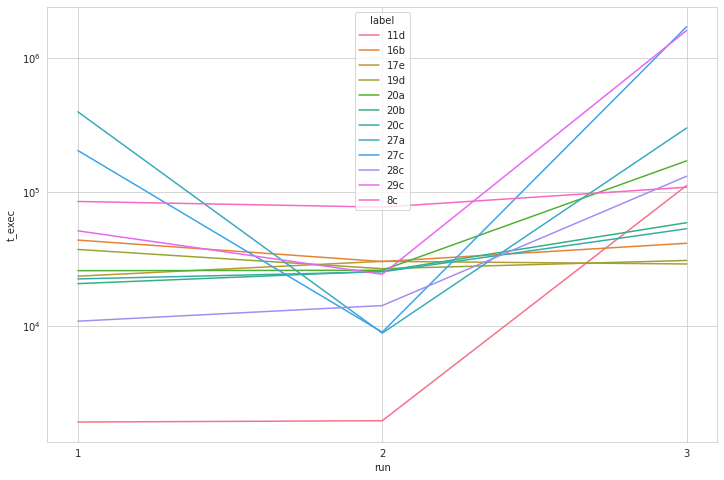

In [33]:
fig, ax = plt.subplots(figsize=(12,8))
g = sns.lineplot(data=df_out, x="run", y="t_exec", hue="label", ax=ax)
g.set_yscale("log")
g.set_xticks([1, 2, 3])

## Add the "internal" qerror of the optimizer estimates to the comparison

To calculate "internal qerrors", i.e. qerrors of inner nodes of query plans, we first need to know which operators actually do occur in the plans.

This is important knowledge, because not all operators are meaningful units to compare exected/actual cardinality estimates. For example, estimates for aggregations are pretty straightforward.

Furthermore, some operators are split into multiple steps and would bloat the results. For example, Hash Joins are preceded by a Hash node.

In [34]:
import functools

In [35]:
def gather_node_types(plan):
    types = set([plan["Node Type"]])
    for sub_plan in plan.get("Plans", list()):
        types |= (gather_node_types(sub_plan))
    return types

In [36]:
functools.reduce(lambda x, y: x | y, df_aqo.plan.apply(lambda p: gather_node_types(p[0]["Plan"])), set())

{'Aggregate',
 'Gather',
 'Gather Merge',
 'Hash',
 'Hash Join',
 'Index Only Scan',
 'Index Scan',
 'Materialize',
 'Merge Join',
 'Nested Loop',
 'Seq Scan',
 'Sort'}

Now, let's calculate the mean qerror of all (important) nodes of a query plan:

In [37]:
important_operators = ["Hash Join", "Nested Loop", "Merge Join", "Seq Scan", "Index Scan", "Index Only Scan"]
def calculate_internal_qerror(plan_node):
    internal_qerrors = []
    if plan_node["Node Type"] in important_operators:
        actual_card = plan_node["Actual Rows"]
        expected_card = plan_node["Plan Rows"]
        node_qerror = qerror(actual_card, expected_card)
        internal_qerrors = [node_qerror]
    
    for sub_plan in plan_node.get("Plans", list()):
        internal_qerrors += calculate_internal_qerror(sub_plan)
        
    return internal_qerrors

In [38]:
df_aqo["qerror_internal"] = df_aqo.plan.apply(lambda p: np.mean(calculate_internal_qerror(p[0]["Plan"])))

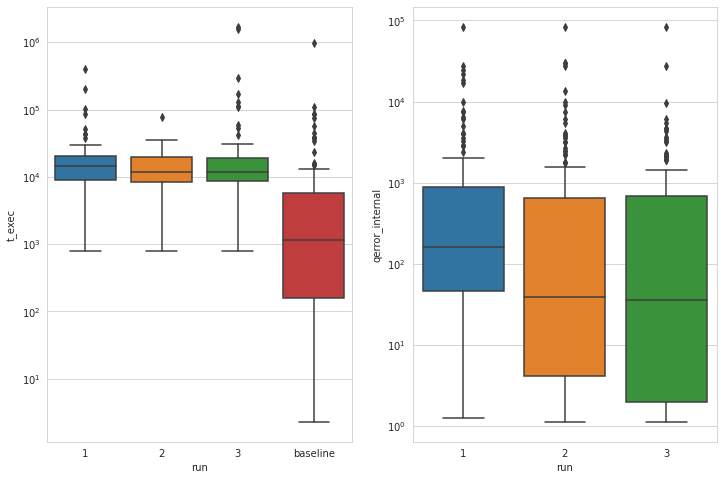

In [39]:
fig, (ax_t_exec, ax_qerror) = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
g = sns.boxplot(data=pd.concat([df_aqo, df_baseline]), x="run", y="t_exec", ax=ax_t_exec)
g.set_yscale("log")
g = sns.boxplot(data=df_aqo, x="run", y="qerror_internal", ax=ax_qerror)
g.set_yscale("log")